LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from pathlib import Path
import torch
from torch import nn
import random

import sys
sys.path.insert(0, '/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes')

In [3]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
print(os.getcwd()) 

/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes


In [5]:
dir_path = r"/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/dataset"
data_path = os.chdir(dir_path)
print(os.listdir(data_path))

['8', '6', '1', '3', '5', '4', '7', '0', '2']


In [6]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} csvs in '{dirpath}'.")


walk_through_dir(dir_path)

There are 9 directories and 0 csvs in '/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/dataset'.
There are 0 directories and 81 csvs in '/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/dataset/8'.
There are 0 directories and 221 csvs in '/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/dataset/6'.
There are 0 directories and 129 csvs in '/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/dataset/1'.
There are 0 directories and 106 csvs in '/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/dataset/3'.
There are 0 directories and 450 csvs in '/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/dataset/5'.
There are 0 directories and 344 csvs in '/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/dataset/4'.
There are 0 directories and 15 csvs in '/mnt/drv01/alt.home/mark/pr

Gather all CSV paths

In [7]:
import glob

csv_paths = glob.glob(dir_path + '/**/*.csv', recursive=True)
print(f"Found {len(csv_paths)} CSVs.")


Found 1959 CSVs.


In [8]:
# print(cleaned_sample[0].head())

FEATURE EXTRACTION

⚠️ Skipped WELL-00003_20170514060000.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170813030000.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170821090300.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170812220116.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170812170025.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170812120000.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170914210000.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170514110000.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170812070038.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170813080105.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170915170000.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170813130131.csv: single positional index

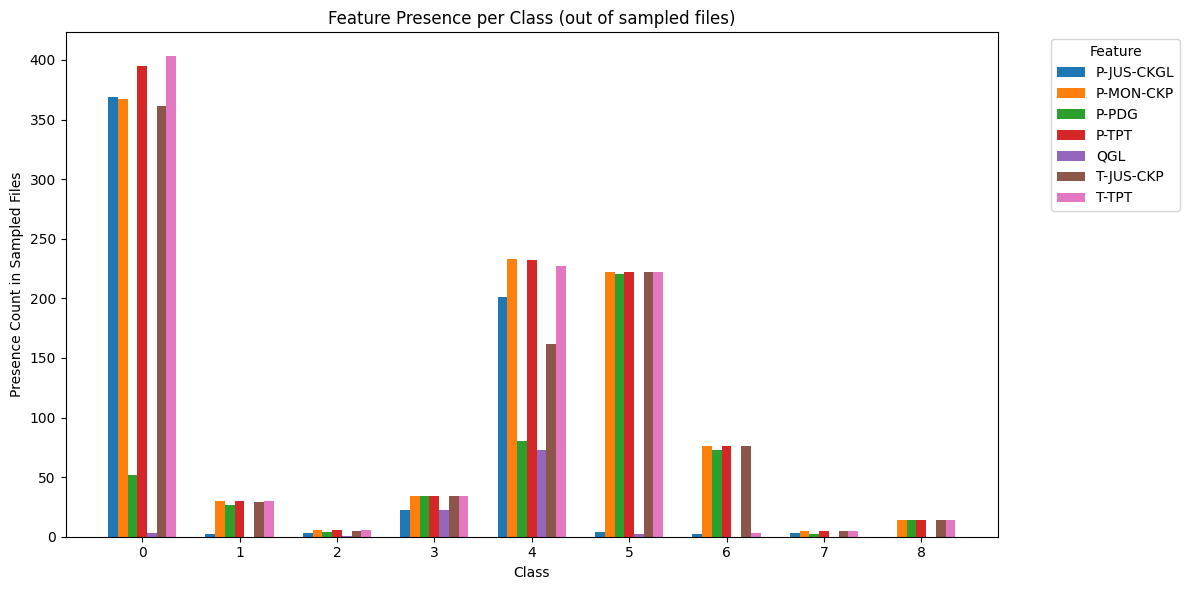

In [9]:
csv_dir = Path(r"/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/train_split")
csv_files = list(csv_dir.glob("*.csv"))

from data_visualisation import variation

_ = variation(csv_files, n_samples=1061)

DATA PREPROCESSING

Data Cleaning

In [10]:
from data_cleaning import clean_with_peer_imputation


# Datasets
train_root = r"/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/train_split"

test_root = r"/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/test_split"
val_root = r"/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/val_split"

train_data_cleaned = clean_with_peer_imputation(train_root, n_peers=10, missing_threshold=3)
test_data_cleaned = clean_with_peer_imputation(test_root, n_peers=10, missing_threshold=3)
val_data_cleaned = clean_with_peer_imputation(val_root, n_peers=10, missing_threshold=3)

# for csv_file in train_data:
#     df = pd.read_csv(csv_file)
#     df_cleaned = clean_with_imputation(df)
#     train_data_cleaned.append(df_cleaned)

# for csv_file in test_data:
#     df = pd.read_csv(csv_file)
#     df_cleaned = clean_with_imputation(df)
#     test_data_cleaned.append(df_cleaned)


# for csv_file in val_data:
#     df = pd.read_csv(csv_file)
#     df_cleaned = clean_with_imputation(df)
#     val_data_cleaned.append(df_cleaned)

print(f"\n Cleaned {len(train_data_cleaned)} train, {len(test_data_cleaned)} test and {len(val_data_cleaned)} validation files. \n Each item is a cleaned DataFrame.")

/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/drv01/alt.home/mark/projects/anomaly_detectio


 Cleaned 756 out of 1061 files.


/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/drv01/alt.home/mark/projects/anomaly_detectio


 Cleaned 195 out of 275 files.


/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/drv01/alt.home/mark/projects/anomaly_detectio


 Cleaned 192 out of 274 files.

 Cleaned 756 train, 195 test and 192 validation files. 
 Each item is a cleaned DataFrame.


In [11]:
len(train_data_cleaned), len(test_data_cleaned), len(val_data_cleaned)

(756, 195, 192)

In [12]:
# Set seed
#random.seed(42)

# 1. Define split folders
train_path = Path(r"/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/train_split")
val_path = Path(r"/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/val_split")
test_path = Path(r"/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/test_split")

# 2. Get all CSV file paths inside splits
train_data = list(train_path.glob("*.csv"))
val_data = list(val_path.glob("*.csv"))
test_data = list(test_path.glob("*.csv"))

In [13]:
len(train_data), len(test_data), len(val_data)

(1061, 275, 274)

In [14]:
import random

random.choice(train_data_cleaned)

,timestamp,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class,instance_label
0,2017-08-13 08:00:00.000000,-6887865.0,20934760.0,105.5598,11852330.0,64.91358,2.029865e+09,0,0,0,real
1,2017-08-13 08:00:01.000000,-6887865.0,20931310.0,105.5553,11850060.0,64.91363,2.029865e+09,0,0,0,real
2,2017-08-13 08:00:02.000000,-6887865.0,20927870.0,105.5508,11847790.0,64.91367,2.029865e+09,0,0,0,real
3,2017-08-13 08:00:03.000000,-6887865.0,20930170.0,105.5531,11845510.0,64.91371,2.029865e+09,0,0,0,real
4,2017-08-13 08:00:04.000000,-6887865.0,20932460.0,105.5553,11843240.0,64.91376,2.029865e+09,0,0,0,real
...,...,...,...,...,...,...,...,...,...,...,...
10769,2017-08-13 10:59:29.000000,-6887865.0,20877310.0,105.6892,11771420.0,65.14170,2.062931e+09,0,0,0,real
10770,2017-08-13 10:59:30.000000,-6887865.0,20886500.0,105.6881,11770510.0,65.14172,2.062931e+09,0,0,0,real
10771,2017-08-13 10:59:31.000000,-6887865.0,20887650.0,105.6870,11769600.0,65.14173,2.062931e+09,0,0,0,real
10772,2017-08-13 10:59:32.000000,-6887865.0,20888800.0,105.6858,11768690.0,65.14175,2.062931e+09,0,0,0,real


Data Normilazation

In [16]:
import sys
sys.path.insert(0, '/mnt/drv01/alt.home/mark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes')
from normalization import minmax_normalize, zscore_normalize

# Choose normalization method by name:
normalization_method = "zscore"  #"zscore"  or "minmax"

# Apply normalization to all cleaned DataFrames
train_data_clean_norm = []
test_data_clean_norm = []
val_data_clean_norm = []

# Normalize each DataFrame in the cleaned lists - train
for df in train_data_cleaned:
    if normalization_method.lower() == "minmax":
        df_norm = minmax_normalize(df)
    elif normalization_method.lower() == "zscore":
        df_norm = zscore_normalize(df)
    else:
        raise ValueError(f"Unknown normalization method: {normalization_method}")
    
    train_data_clean_norm.append(df_norm)

# Normalize each DataFrame in the cleaned lists - test
for df in test_data_cleaned:
    if normalization_method.lower() == "minmax":
        df_norm = minmax_normalize(df)
    elif normalization_method.lower() == "zscore":
        df_norm = zscore_normalize(df)
    else:
        raise ValueError(f"Unknown normalization method: {normalization_method}")
    
    test_data_clean_norm.append(df_norm)

# Normalize each DataFrame in the cleaned lists - val
for df in val_data_cleaned:
    if normalization_method.lower() == "minmax":
        df_norm = minmax_normalize(df)
    elif normalization_method.lower() == "zscore":
        df_norm = zscore_normalize(df)
    else:
        raise ValueError(f"Unknown normalization method: {normalization_method}")
    
    val_data_clean_norm.append(df_norm)

print(f"\n Normalized {len(train_data_clean_norm)} train {len(test_data_clean_norm)} test and {len(val_data_clean_norm)} files using '{normalization_method}' scaling.")


 Normalized 756 train 195 test and 192 files using 'zscore' scaling.


Anomally Division Visualisation

DATA LABELS

In [17]:
train_data_clean_norm[0]

,timestamp,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
0,2017-05-06 22:01:03.000000,0.0,-0.582372,-1.320816,1.732227,1.735536,1.731985,0.0,0.0,0
1,2017-05-06 22:01:04.000000,0.0,-0.569716,-1.316134,1.731372,1.735536,1.732632,0.0,0.0,0
2,2017-05-06 22:01:05.000000,0.0,-0.557059,-1.306768,1.731372,1.735536,1.733279,0.0,0.0,0
3,2017-05-06 22:01:06.000000,0.0,-0.544402,-1.302085,1.731372,1.735536,1.733880,0.0,0.0,0
4,2017-05-06 22:01:07.000000,0.0,-0.531746,-1.297403,1.731372,1.733994,1.734573,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
17933,2017-05-07 02:59:56.000000,0.0,1.180061,1.175105,-1.730938,-1.640009,-1.510931,0.0,0.0,0
17934,2017-05-07 02:59:57.000000,0.0,1.186390,1.179787,-1.730938,-1.640009,-1.510931,0.0,0.0,0
17935,2017-05-07 02:59:58.000000,0.0,1.192718,1.189153,-1.731792,-1.640009,-1.510885,0.0,0.0,0
17936,2017-05-07 02:59:59.000000,0.0,1.199046,1.198519,-1.731792,-1.640009,-1.510839,0.0,0.0,0


In [18]:
from class_labels import class_labels, anomally_classs

# Example call on one cleaned DataFrame
df = random.choice(train_data_clean_norm)
anomally_classs(df, class_col="class", class_labels=class_labels)

Last class 0: Normal


{np.int64(0): 'Normal'}

In [19]:
from data_label_split import split_X_y

X_train, y_train = split_X_y(train_data_clean_norm)

X_test, y_test = split_X_y(test_data_clean_norm)

X_val, y_val = split_X_y(val_data_clean_norm)

print(f"\n Extracted features: \n {len(X_train)} train files \n {len(X_test)} test files \n {len(X_val)} val files")

 DataFrame 1/756: X shape=(17938, 8), y=0
 DataFrame 2/756: X shape=(21600, 8), y=1
 DataFrame 3/756: X shape=(7121, 8), y=4
 DataFrame 4/756: X shape=(17710, 8), y=0
 DataFrame 5/756: X shape=(17899, 8), y=0
 DataFrame 6/756: X shape=(17947, 8), y=0
 DataFrame 7/756: X shape=(28799, 8), y=2
 DataFrame 8/756: X shape=(29299, 8), y=5
 DataFrame 9/756: X shape=(29299, 8), y=5
 DataFrame 10/756: X shape=(29299, 8), y=5
 DataFrame 11/756: X shape=(17924, 8), y=0
 DataFrame 12/756: X shape=(12021, 8), y=6.0
 DataFrame 13/756: X shape=(17959, 8), y=0
 DataFrame 14/756: X shape=(17874, 8), y=0
 DataFrame 15/756: X shape=(29299, 8), y=5
 DataFrame 16/756: X shape=(17962, 8), y=3
 DataFrame 17/756: X shape=(17898, 8), y=0
 DataFrame 18/756: X shape=(29299, 8), y=5
 DataFrame 19/756: X shape=(17826, 8), y=0
 DataFrame 20/756: X shape=(17810, 8), y=0
 DataFrame 21/756: X shape=(61999, 8), y=3
 DataFrame 22/756: X shape=(17962, 8), y=0
 DataFrame 23/756: X shape=(17475, 8), y=0
 DataFrame 24/756: 

In [20]:
X_train[0].shape, y_train[0].shape, X_val[0].shape, y_val[0].shape, X_test[0].shape, y_test[0].shape

((17938, 8), (), (17923, 8), (), (29299, 8), ())

In [21]:
print(f"Class: {random.choice(y_train)} =>> {class_labels[random.choice(y_train)]}") 

Class: 0 =>> Normal


CONVERTING DATA INTO TORCH TENSORS

1️. Models — there’s no nn.Linear, nn.Conv2d, etc.

2️. Automatic differentiation — no autograd to compute gradients.

3️. Optimizers — no SGD, Adam, or other optimizers to update weights.

4️. Loss functions — you’d have to code all losses (cross-entropy, MSE) manually.

5️. GPU acceleration — NumPy is strictly CPU-bound.

6️. Training loop infrastructure — PyTorch (or TensorFlow) provides all the tools to build modern training workflows.

Vertical Concanation(row-wise training) due to differences in the number of rows

In [22]:
# _rows = max(arr.shape[0] for arr in X_train)
# _rows

In [23]:
length = [arr.shape[0] for arr in X_train]
max_rows = int(np.percentile(length,90))
print(f"Max rows in X_train: {max_rows}")

Max rows in X_train: 29299


Data Padding

In [24]:
from data_cleaning import padding

#max_rows = max(arr.shape[0] for arr in X_train)
max_rows = int(np.percentile(length,90))


#Train data padding
X_train_padded = padding(X_train, max_rows)

#Val data padding
X_val_padded = padding(X_val, max_rows)

# Test data padding
X_test_padded = padding(X_test, max_rows)

In [25]:
print(f" Sample data = {X_train_padded[0]} and its class is :{y_train[0]} => {class_labels[y_train[0]]}")

 Sample data = [[ 0.         -0.5823723  -1.32081646 ...  1.73198534  0.
   0.        ]
 [ 0.         -0.56971569 -1.31613369 ...  1.73263231  0.
   0.        ]
 [ 0.         -0.55705907 -1.30676813 ...  1.73327927  0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]] and its class is :0 => Normal


In [26]:
X_train_padded[0].shape

(29299, 8)

In [27]:
for i, sample in enumerate(X_train_padded):
    if len(sample) != max_rows:
        print(f"Inconsistent length at index {i}: got {len(sample)}, expected {max_rows}")
print(f"All {len(X_train)} samples are consistent with {max_rows} rows")

All 756 samples are consistent with 29299 rows


In [28]:
len(X_train), len(X_train_padded)

(756, 756)

In [29]:
type(X_train_padded[0])

numpy.ndarray

Convert Data to Dataset and Dataloaders

In [30]:
from torch.utils.data import Dataset, DataLoader


class WellDataset(Dataset):
    def __init__(self, data_arrays, labels):
        """
        Args:
            data_arrays (List[np.ndarray]): each sample (n_rows, n_cols)
            labels      (List[int] or np.ndarray)
        """
        self.data   = data_arrays
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        X = self.data[idx].astype(np.float32)

        # ---- scrub NaN / +Inf / -Inf -----------------------------
        X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)

        X_flat = X.reshape(-1)                      # (n_rows * n_cols,)
        y      = self.labels[idx]

        return torch.tensor(X_flat, dtype=torch.float32), \
               torch.tensor(y,       dtype=torch.long)


In [31]:
BATCH_SIZE = 128

train_dataset = WellDataset(X_train_padded, y_train)
train_dataloader = DataLoader(train_dataset, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)
test_dataset = WellDataset(X_test_padded, y_test)
test_dataloader = DataLoader(test_dataset,
                                batch_size=BATCH_SIZE, 
                                shuffle=False)

val_dataset = WellDataset(X_val_padded, y_val)
val_dataloader = DataLoader(val_dataset,
                                batch_size=BATCH_SIZE, 
                                shuffle=False)

In [32]:
for X_batch, y_batch in train_dataloader:
    print("X_batch shape:", X_batch.shape)
    print("y_batch shape:", y_batch.shape)
    print("batch_size, n_rows * n_cols")
    break  # Only check the first batch


X_batch shape: torch.Size([128, 234392])
y_batch shape: torch.Size([128])
batch_size, n_rows * n_cols


In [33]:
print(set(y_train))  # Must be {0, 1}

{np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.float64(6.0), np.float64(7.0), np.int64(8)}


In [34]:
print(X_val_padded[0].shape)              # Should be (T, F)
print(X_val_padded[0].reshape(-1).shape)  # Should be (T × F,)

(29299, 8)
(234392,)


In [35]:
input_size = train_dataset[0][0].shape[0]
print(f"Input size: {input_size} (T × F)")

Input size: 234392 (T × F)


IMPORT MODELS

MODEL_0

In [36]:
#Import the models
from MODELS import model_00
from MODELS import  model_01

# Input size
input_size = train_dataset[0][0].shape[0]

In [37]:
#MODEL_00

trained_model_0, hist = model_00(train_dataloader, 
                                 val_dataloader, 
                                 input_size)

[Epoch 01/10] Train: loss 6.3433 | acc 49.07%   Val: loss 2.5635 | acc 78.65% | macro-F1 0.4944
[Epoch 02/10] Train: loss 2.2461 | acc 85.71%   Val: loss 3.0420 | acc 79.69% | macro-F1 0.5723
[Epoch 03/10] Train: loss 1.0699 | acc 92.59%   Val: loss 2.6180 | acc 81.77% | macro-F1 0.6490
[Epoch 04/10] Train: loss 0.4556 | acc 95.50%   Val: loss 2.8409 | acc 82.81% | macro-F1 0.6825
[Epoch 05/10] Train: loss 0.2034 | acc 97.62%   Val: loss 2.8462 | acc 84.38% | macro-F1 0.6941
[Epoch 06/10] Train: loss 0.2757 | acc 97.09%   Val: loss 2.5815 | acc 84.38% | macro-F1 0.7345
[Epoch 07/10] Train: loss 0.2845 | acc 98.41%   Val: loss 2.4651 | acc 84.38% | macro-F1 0.7345
[Epoch 08/10] Train: loss 0.1436 | acc 98.94%   Val: loss 2.4644 | acc 85.42% | macro-F1 0.7421
[Epoch 09/10] Train: loss 0.2999 | acc 97.88%   Val: loss 2.4810 | acc 85.94% | macro-F1 0.7487
[Epoch 10/10] Train: loss 0.1066 | acc 98.41%   Val: loss 2.5378 | acc 85.94% | macro-F1 0.7486


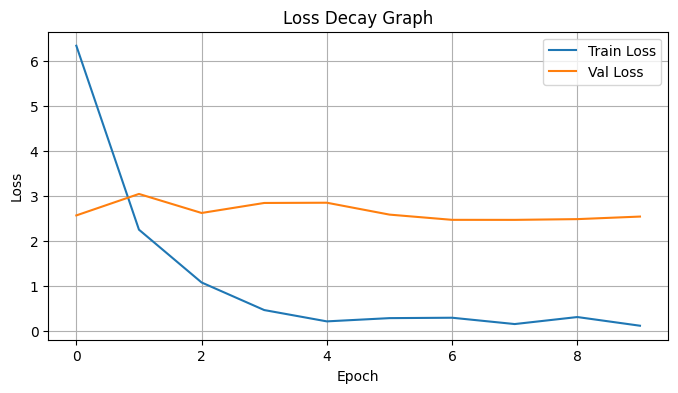

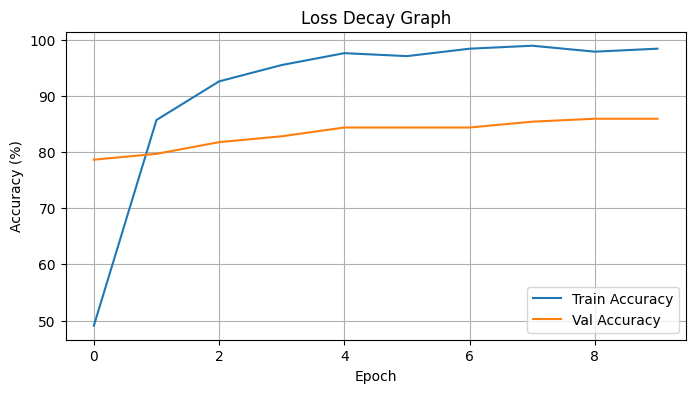

In [38]:
#MODLE_00

# ---- Plot Loss ----
plt.figure(figsize=(8, 4))
plt.plot(hist["train_loss"], label="Train Loss")
plt.plot(hist["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Decay Graph")
plt.legend()
plt.grid(True)   
plt.show()

# ---- Plot Accuracy ----
plt.figure(figsize=(8, 4))
plt.plot(hist["train_acc"], label="Train Accuracy")
plt.plot(hist["val_acc"], label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)") 
plt.title("Loss Decay Graph")
plt.legend()
plt.grid(True)  
plt.show()

In [39]:
#MODEL_01

Learning_rate = 1e-3
No_of_epochs = 10

input_size = train_dataset[0][0].shape[0]   # after flattening
trained_model_1, hist_1 = model_01(
    train_loader     = train_dataloader,
    val_loader       = val_dataloader,
    input_size       = input_size,
    hidden_size      = 256,      
    lr               = Learning_rate,
    epochs           = No_of_epochs,
    num_classes      = 9         # adjust if different
)


[Epoch 01/10] Train: loss 1.9450 | acc 52.91%   Val: loss 1.2617 | acc 55.21% | macro-F1 0.2836
[Epoch 02/10] Train: loss 1.3838 | acc 67.99%   Val: loss 1.0911 | acc 61.98% | macro-F1 0.3376
[Epoch 03/10] Train: loss 1.1548 | acc 68.65%   Val: loss 0.9426 | acc 71.35% | macro-F1 0.4175
[Epoch 04/10] Train: loss 0.9179 | acc 71.56%   Val: loss 0.7863 | acc 79.69% | macro-F1 0.6130
[Epoch 05/10] Train: loss 0.7964 | acc 77.91%   Val: loss 0.6994 | acc 84.90% | macro-F1 0.6320
[Epoch 06/10] Train: loss 0.6979 | acc 84.66%   Val: loss 0.6104 | acc 90.62% | macro-F1 0.8172
[Epoch 07/10] Train: loss 0.6070 | acc 83.99%   Val: loss 0.5462 | acc 91.15% | macro-F1 0.8654
[Epoch 08/10] Train: loss 0.5162 | acc 86.90%   Val: loss 0.4906 | acc 92.19% | macro-F1 0.8765
[Epoch 09/10] Train: loss 0.4638 | acc 87.83%   Val: loss 0.4510 | acc 92.71% | macro-F1 0.9206
[Epoch 10/10] Train: loss 0.3525 | acc 90.48%   Val: loss 0.4128 | acc 93.23% | macro-F1 0.9310


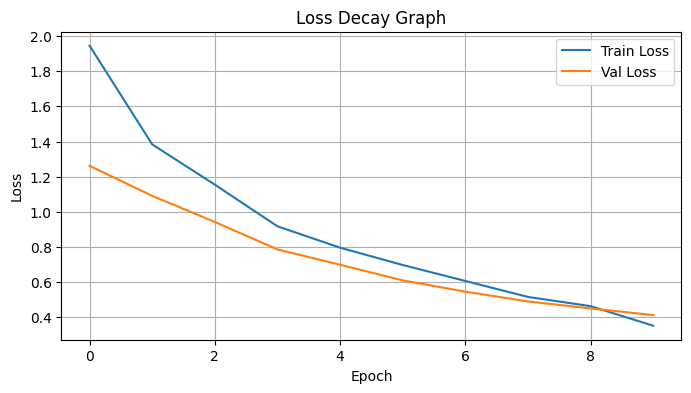

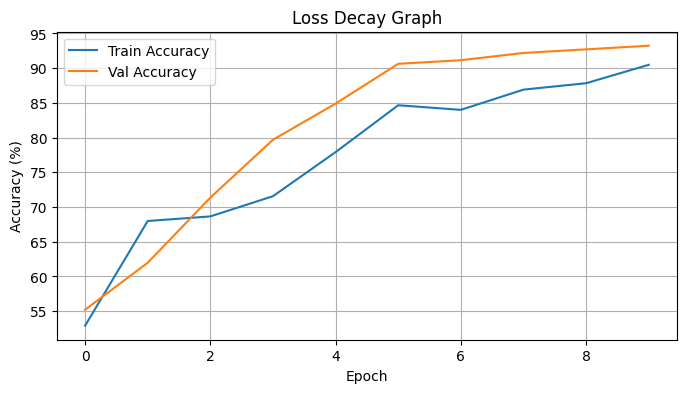

In [40]:
##MODLE_01

# ---- Plot Loss ----
plt.figure(figsize=(8, 4))
plt.plot(hist_1["train_loss"], label="Train Loss")
plt.plot(hist_1["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Decay Graph")
plt.legend()
plt.grid(True)   
plt.show()

# ---- Plot Accuracy ----
plt.figure(figsize=(8, 4))
plt.plot(hist_1["train_acc"], label="Train Accuracy")
plt.plot(hist_1["val_acc"], label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Loss Decay Graph")
plt.legend()
plt.grid(True)   
plt.show()


INFERENCE

In [41]:
inputs, labels = next(iter(train_dataloader))
print("Has NaN in inputs? ", torch.isnan(inputs).any().item())
print("Max abs value     :", inputs.abs().max().item())
print("Label range       :", labels.min().item(), "→", labels.max().item())


Has NaN in inputs?  False
Max abs value     : 24.196147918701172
Label range       : 0 → 8


In [ ]:
#MODEL_00

from evaluation import evaluate_model

# ---------- parameters ----------
k = 10                 # how many random samples
seed = None            # set e.g. 42 for reproducibility, or leave None

# ---------- choose random indices ----------
rng = np.random.default_rng(seed)
idx = rng.choice(len(X_test_padded), size=k, replace=False)   # unique indices

# ---------- fetch & flatten ----------
X_batch = [X_test_padded[i] for i in idx]      # list of (T,F) arrays
y_true  = [y_test[i]         for i in idx]     # list/array of ints

X_batch_flat = torch.stack([
    torch.tensor(sample.reshape(-1), dtype=torch.float32)
    for sample in X_batch
])

# ---------- run through the model ----------
device = next(trained_model_0.parameters()).device   # cpu or cuda
trained_model_0.eval()
with torch.no_grad():
    outputs = trained_model_0(X_batch_flat.to(device))
    y_pred_0 = torch.argmax(outputs, dim=1).cpu().tolist()

# ---------- display results ----------
print(" idx │ true → pred")
print("─────┼────────────")
for i, (tid, t, p) in enumerate(zip(idx, y_true, y_pred_0)):
    print(f"{tid:4d} │  {t}   →  {p}")

#MODEL_00

from evaluation import evaluate_model

metrics = evaluate_model(
    y_true,
    y_pred_0,
    task_type="multiclass",
    average="macro"
)

print("MODEL_00 METRICS:")
print(metrics)

 idx │ true → pred
─────┼────────────
 156 │  5.0   →  1
 102 │  1   →  1
 153 │  4   →  0
 118 │  0   →  0
 137 │  4   →  4
  70 │  5   →  5
  20 │  0   →  0
 171 │  1   →  1
  99 │  3   →  3
 145 │  0   →  0


NameError: name 'f' is not defined

In [80]:
#MODEL_01

# ---------- parameters ----------
k = 10                 # how many random samples
seed = None            # set e.g. 42 for reproducibility, or leave None

# ---------- choose random indices ----------
rng = np.random.default_rng(seed)
idx = rng.choice(len(X_test_padded), size=k, replace=False)   # unique indices

# ---------- fetch & flatten ----------
X_batch = [X_test_padded[i] for i in idx]      # list of (T,F) arrays
y_true  = [y_test[i]         for i in idx]     # list/array of ints

X_batch_flat = torch.stack([
    torch.tensor(sample.reshape(-1), dtype=torch.float32)
    for sample in X_batch
])

# ---------- run through the model ----------
device = next(trained_model_1.parameters()).device   # cpu or cuda
trained_model_1.eval()
with torch.no_grad():
    outputs = trained_model_1(X_batch_flat.to(device))
    y_pred_1 = torch.argmax(outputs, dim=1).cpu().tolist()

# ---------- display results ----------
print(" idx │ true → pred")
print("─────┼────────────")
for i, (tid, t, p) in enumerate(zip(idx, y_true, y_pred_1)):
    print(f"{tid:4d} │  {t}   →  {p}")


#MODEL_01

from evaluation import evaluate_model

metrics = evaluate_model(
    y_true,
    y_pred_1,
    task_type="multiclass",
    average="macro"
)

print("MODEL_01 METRICS:")
print(metrics)


 idx │ true → pred
─────┼────────────
 127 │  5   →  5
  37 │  5   →  5
 113 │  5   →  5
 142 │  0   →  0
  41 │  5   →  5
 184 │  0   →  0
  59 │  5   →  5
  96 │  5   →  3
 107 │  5   →  5
 132 │  0   →  0
MODEL_01 METRICS:
{'accuracy': 0.9, 'precision': 0.6666666666666666, 'recall': 0.6190476190476191, 'f1': 0.6410256410256411, 'macro_f1': 0.6410256410256411}


EVALUATION

In [81]:
# # ---------- full test-set inference ----------
# trained_model_0.eval()

# y_true_all_0 = []
# y_pred_all_0 = []

# device = next(trained_model_1.parameters()).device

# with torch.no_grad():
#     for x, y in test_dataloader:   
#         x = x.to(device)

#         outputs = trained_model_1(x)
#         preds = torch.argmax(outputs, dim=1)

#         y_true_all_0.extend(y.cpu().numpy())
#         y_pred_all_0.extend(preds.cpu().numpy())

#  compute predictions (on device)
trained_model_0.eval()
y_true_all_0, y_pred_all_0 = [], []

with torch.no_grad():
    for X_batch, y_batch in test_dataloader:
        X_batch = X_batch.to(next(trained_model_0.parameters()).device)
        preds = trained_model_0(X_batch).argmax(1).cpu()
        y_true_all_0.append(y_batch)
        y_pred_all_0.append(preds)

y_true_all_0 = torch.cat(y_true_all_0).numpy()
y_pred_all_0 = torch.cat(y_pred_all_0).numpy()

In [82]:
#MODEL_00

from evaluation import evaluate_model

metrics = evaluate_model(
    y_true_all_0,
    y_pred_all_0,
    task_type="multiclass",
    average="macro"
)

print("MODEL_00 METRICS:")
print(metrics)


MODEL_00 METRICS:
{'accuracy': 0.9435897435897436, 'precision': 0.7902486061397388, 'recall': 0.8004494295343968, 'f1': 0.7941991910809547, 'macro_f1': 0.7941991910809547}


In [83]:
# ---------- full test-set inference ----------
# trained_model_1.eval()

# y_true_all_1 = []
# y_pred_all_1 = []

# device = next(trained_model_1.parameters()).device

# with torch.no_grad():
#     for x, y in test_dataloader:   
#         x = x.to(device)

#         outputs = trained_model_1(x)
#         preds = torch.argmax(outputs, dim=1)

#         y_true_all_1.extend(y.cpu().numpy())
#         y_pred_all_1.extend(preds.cpu().numpy())

#  compute predictions (on device)
trained_model_1.eval()
y_true_all_1, y_pred_all_1 = [], []

with torch.no_grad():
    for X_batch, y_batch in test_dataloader:
        X_batch = X_batch.to(next(trained_model_1.parameters()).device)
        preds = trained_model_1(X_batch).argmax(1).cpu()
        y_true_all_1.append(y_batch)
        y_pred_all_1.append(preds)

y_true_all_1 = torch.cat(y_true_all_1).numpy()
y_pred_all_1 = torch.cat(y_pred_all_1).numpy()

In [85]:
#MODEL_01

from evaluation import evaluate_model

metrics = evaluate_model(
    y_true_all_1,
    y_pred_all_1,
    task_type="multiclass",
    average="macro"
)

print("MODEL_01 METRICS:")
print(metrics)


MODEL_01 METRICS:
{'accuracy': 0.9538461538461539, 'precision': 0.8538011695906432, 'recall': 0.9787873482726425, 'f1': 0.8917613250946584, 'macro_f1': 0.8917613250946584}


In [ ]:
# trained_model_1.eval()
# all_preds = []
# all_labels = []

# # Get device from model
# device = next(trained_model_1.parameters()).device

# with torch.no_grad():
#     for X_batch, y_batch in test_dataloader:
#         X_batch = X_batch.to(device)
#         y_batch = y_batch.to(device)

#         outputs = trained_model_1(X_batch)
#         _, preds = torch.max(outputs, 1)

#         all_preds.append(preds)
#         all_labels.append(y_batch)

# # Concatenate and compute accuracy
# all_preds = torch.cat(all_preds)
# all_labels = torch.cat(all_labels)

# accuracy = (all_preds == all_labels).float().mean()
# print(f" Test Accuracy: {accuracy:.2%}")


 Test Accuracy: 95.38%


In [86]:
#  compute predictions (on device)
trained_model_1.eval()
y_true_all, y_pred_all = [], []

with torch.no_grad():
    for X_batch, y_batch in test_dataloader:
        X_batch = X_batch.to(next(trained_model_1.parameters()).device)
        preds = trained_model_1(X_batch).argmax(1).cpu()
        y_true_all.append(y_batch)
        y_pred_all.append(preds)

y_true_all = torch.cat(y_true_all).numpy()
y_pred_all = torch.cat(y_pred_all).numpy()

CONFUSION MATRIX, LOSS FXN GRAPH 

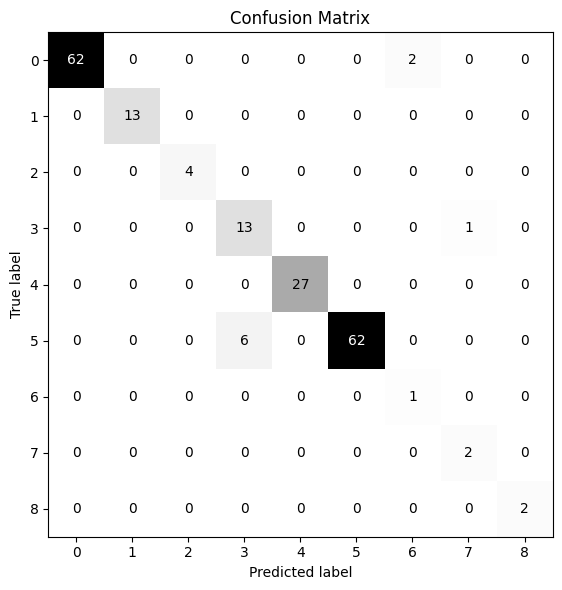

In [91]:

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

num_classes = len(np.unique(np.concatenate([y_true_all, y_pred_all])))
cm = confusion_matrix(y_true_all, y_pred_all, labels=np.arange(num_classes))

fig, ax = plt.subplots(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.arange(num_classes))
disp.plot(ax=ax, cmap="Greys", values_format="d", colorbar=False)
ax.set_title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Use the test predictions from MODEL_01
cm = confusion_matrix(y_true_all, y_pred_all)
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=range(9), yticklabels=range(9))
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.grid(False)
plt.tight_layout()
plt.show()


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.